In [1]:
"""This script can plot all log data for single simulation with multiple simulation types"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil

In [2]:
# Replace with your log file path
jid = 355747
skip_lines = 100                         # skipping first 100 lines 
log_file = f'Output.{jid}'

start_index = []
end_index = []
sim_type  = []
# Find the data section in the log file
with open(log_file, 'r') as f:
    lines = f.readlines()
    
# Extracting all different phases simulations:
    for idx, line in enumerate(lines):
        if "Time Step TotEng KinEng" in line:
            start_index.append(idx+1)
        elif "Time step     :" in line:
            time_step = idx
        if "Loop time" in line:
            end_index.append(idx+1)
        if "Setting up" in line:
            sim_type.append(idx)

start_index = np.array(start_index)         # starting indexes
end_index = np.array(end_index)             # End indexes

# Dealing if the simulations has stopped mid-way:
if start_index.shape[0] != end_index.shape[0]:
    end_index = np.append(end_index, int(len(lines)+1))
    
dt = float(lines[time_step].split()[3])     # Time step used in the simulations
header = lines[start_index[0]-1].split()    # Extract the header file

In [3]:
data_lines = (end_index-1) - start_index  # Total number of data rows
data_columns = len(header)                # Total number of columns

sim_lines = np.zeros((1, data_columns))

for i in range(start_index.shape[0]):
      array = np.array([list(map(float, line.strip().split())) 
                      for line in lines[start_index[i]:end_index[i]-1]])  
      
      sim_lines = np.concatenate((sim_lines, array), axis = 0)

sim_lines = sim_lines[1:, :]           # Getting rid of 1st row, which is zeros
print("Total number of lines:", sim_lines.shape[0])
print("Total number of columns:", sim_lines.shape[1])
print("\n")
print("Simulattion details")
print("-------------------")
for i in range(start_index.shape[0]):
    print(lines[sim_type[i]])
    print("t=", float(lines[end_index[i]-2].split()[0])-float(lines[start_index[i]].split()[0]), "ps")
    print("T=", float(lines[end_index[i]-2].split()[5]), "K")
    print("Vol=", float(lines[end_index[i]-2].split()[10]))
    print("\n")

Total number of lines: 2428
Total number of columns: 11


Simulattion details
-------------------
Setting up Verlet run ...

t= 200.0 ps
T= 9.9564443 K
Vol= 6557185.7


Setting up Verlet run ...

t= 100.0 ps
T= 0.10010437 K
Vol= 6556598.6


Setting up cg style minimization ...

t= 0.09724999999997408 ps
T= 0.10010437 K
Vol= 6556598.6


Setting up fire style minimization ...

t= 2.5130000000000337 ps
T= 1.1136009e-06 K
Vol= 6556598.6


Setting up cg style minimization ...

t= 0.0037499999999681677 ps
T= 1.1136009e-06 K
Vol= 6556945.2




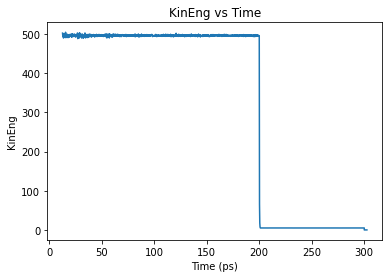

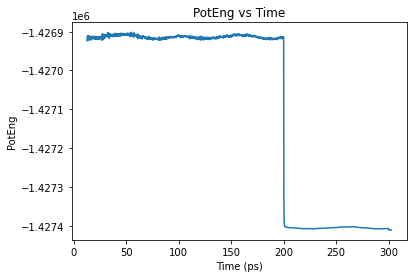

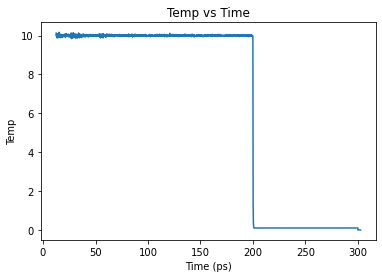

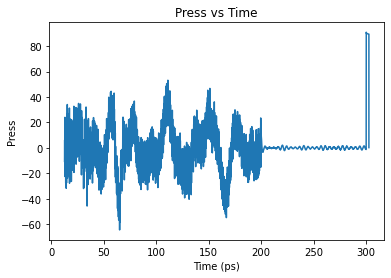

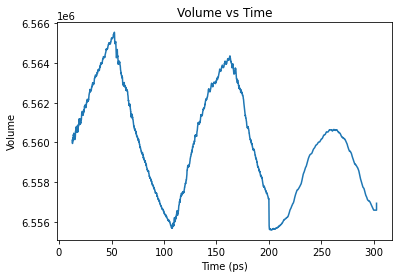

In [4]:
# Read the data into a pandas DataFrame
data = pd.DataFrame(sim_lines, columns = header)

columns = ["KinEng", "PotEng", "Temp", "Press", "Volume"]
for column in columns:
    fig, ax = plt.subplots()
    ax.plot(data["Step"][skip_lines:]*dt, data[column][skip_lines:])
    ax.set_xlabel("Time (ps)")
    ax.set_ylabel(column)
    ax.set_title(f"{column} vs Time")

    # Save the figure to a file
    plt.savefig(f"{column}_vs_time.tif", dpi= 100, bbox_inches = 'tight', facecolor="w")
    plt.show()
    # Close the figure to free memory
    plt.close(fig)

In [5]:
directory_path = os.getcwd()
foldername = f'Output_{jid}'        # Folder name

new_directory_path = os.path.join(directory_path, foldername)
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)

# Move all the *.tif files to the new directory
tif_files = glob.glob("*.tif")
for file in tif_files:
    shutil.move(file, os.path.join(new_directory_path, file))